In [2]:
import pandas as pd

df = pd.read_csv("../taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## EDA on dataset

In [ ]:
# drops half the data, needs cleaning and filling of null
df_no_nulls = df.dropna()
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [3]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [ ]:
df_nulls = df.copy()
df_nulls["null_sum"] = df.isna().sum(axis=1)
df_nulls = df_nulls[df_nulls["null_sum"] > 0]

df_nulls

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,null_sum
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN,2
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,1
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,1
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645,1
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216,2
...,...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN,1
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348,2
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295,1
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236,1


<Axes: >

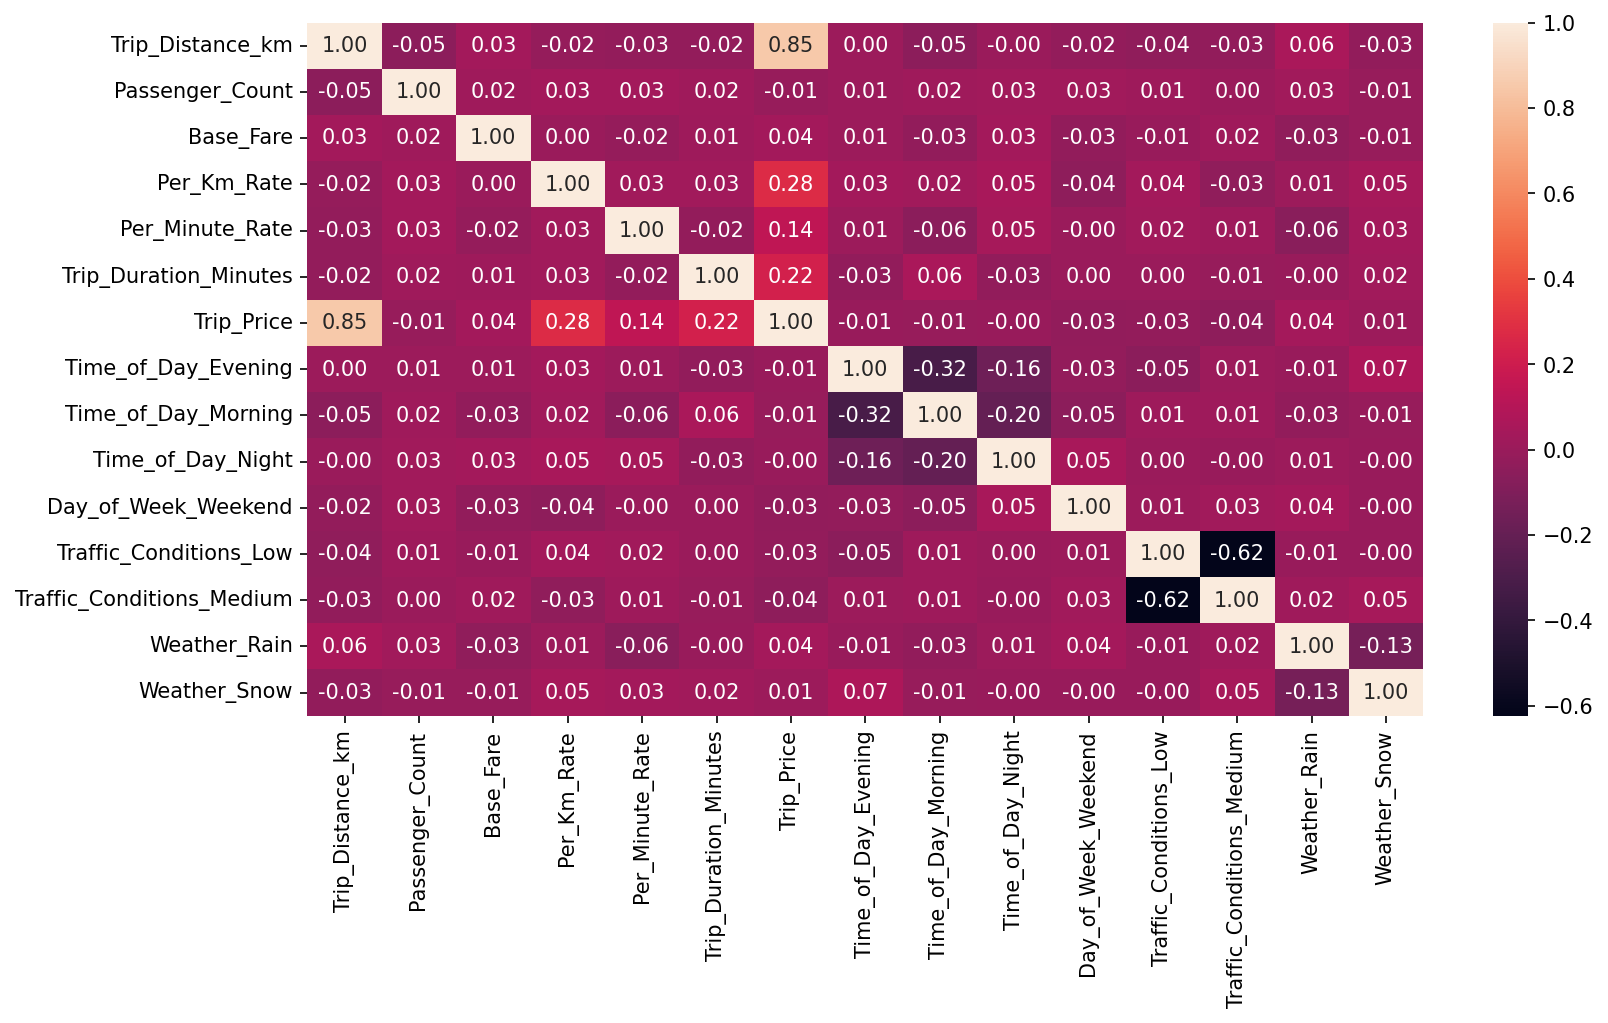

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

encoded_df = pd.get_dummies(df, drop_first=True)*1
encoded_df

fig, ax = plt.subplots(1, figsize=(12,6), dpi=150)
sns.heatmap(encoded_df.corr(), annot=True, fmt=".2f")

<Axes: >

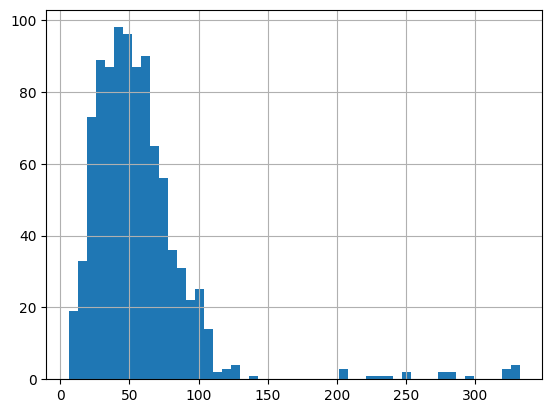

In [26]:
import matplotlib.pyplot as plt

df["Trip_Price"].hist(bins=50)

<Axes: ylabel='Density'>

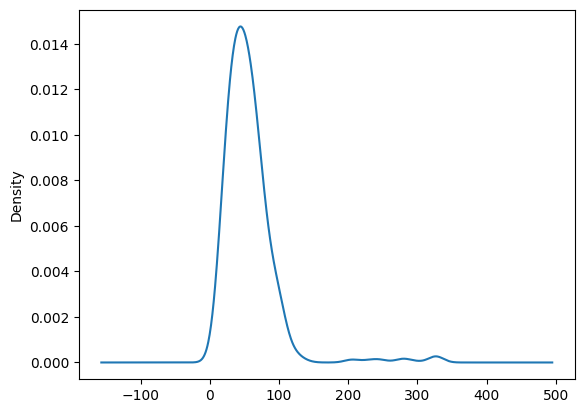

In [ ]:
df["Trip_Price"].plot(kind="kde")

<Axes: >

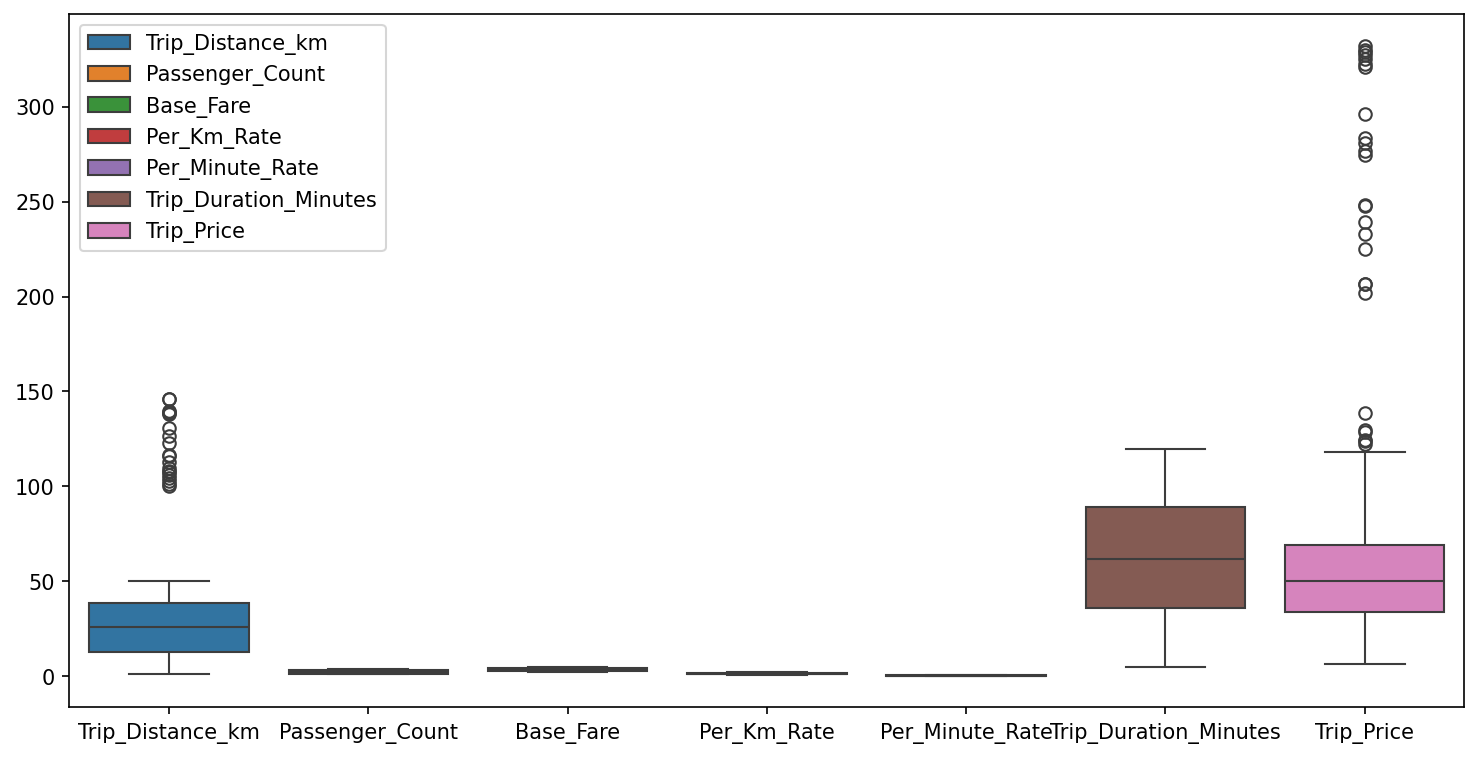

In [32]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=150)
sns.boxplot(df, legend=True)

In [19]:
df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [39]:
df["Trip_Distance_km"].median()

np.float64(25.83)

In [46]:
df["Base_Fare"].mean()

np.float64(3.502989473684211)

In [43]:
df["Passenger_Count"].median()

np.float64(2.0)

In [51]:
df["Per_Km_Rate"].mean()

np.float64(1.2333157894736844)

In [ ]:
df["Per_Minute_Rate"].median()

np.float64(0.2929157894736842)

In [ ]:
df["Trip_Duration_Minutes"].mean()

np.float64(61.86)

In [66]:
df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


## cleaning the data

- ta bort rader med NaN för Trip_Price
- ändra Trip_Distance_km till median
- resten av kolumner med numeriska värden till mean
- och kolumner som är objekt till 'Unknown'

- trip price och trip distance km har outliers uppåt
- median är bra mot outliers så median används till trip distance, samt passenger count och per minute rate, för att få ett jämnt nummer
- resterande blir mean

In [82]:
df_clean = df.copy()

#lägger över totala kostnaden där rader finns för att räkna ut totalen
df_clean["Trip_Price"] = df_clean["Trip_Price"].fillna((df_clean["Base_Fare"] + (df_clean["Per_Km_Rate"]*df_clean["Trip_Distance_km"]) + (df_clean["Per_Minute_Rate"]*df_clean["Trip_Duration_Minutes"])))

# droppar Trip_Price som inte gick att räkna ut för att värden saknats i andra kolumner som används för uträkning av totalen
df_clean = df_clean.dropna(subset=["Trip_Price"])

# lägger till mean eller median för varje numerisk kolumn beroende på om det finns mycket outliers eller inte
col_funcs = {"Trip_Distance_km": "median","Passenger_Count": "median","Base_Fare": "mean","Per_Km_Rate": "mean","Per_Minute_Rate": "median","Trip_Duration_Minutes": "mean"}

# loopar igenom och ändrar nullvärden till mean eller median
for col, func in col_funcs.items():
    if func == "median":
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    if func == "mean":
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# hämtar ut resterande kolumner som inte är numeriska
object_cols = df_clean.select_dtypes(include=["object"]).columns

# loopar igenom dessa och hämtar ut det mest återkommande värdet för varje kolumn, och fyller i detta värde vid nullvärden
for col in object_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)


df_clean.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,26.03,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


## EDA and comparison between cleaned and original df

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
dtypes: float64(7), object(4)
memory usage: 92.2+ KB


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [85]:
df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [84]:
df_clean.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070712,19.474948,1.2300,13.09500,26.030000,37.78500,146.067047
Passenger_Count,2.455748,1.081140,1.0000,2.00000,2.000000,3.00000,4.000000
Base_Fare,3.501299,0.849563,2.0100,2.77000,3.501299,4.20000,5.000000
Per_Km_Rate,1.234846,0.419926,0.5000,0.87000,1.234846,1.59000,2.000000
Per_Minute_Rate,0.292594,0.112630,0.1000,0.19500,0.290000,0.38000,0.500000
Trip_Duration_Minutes,62.125400,31.452064,5.0100,36.77000,62.125400,87.85000,119.840000
Trip_Price,56.797734,40.061687,6.1269,33.74265,50.241200,69.40335,332.043689


<Axes: >

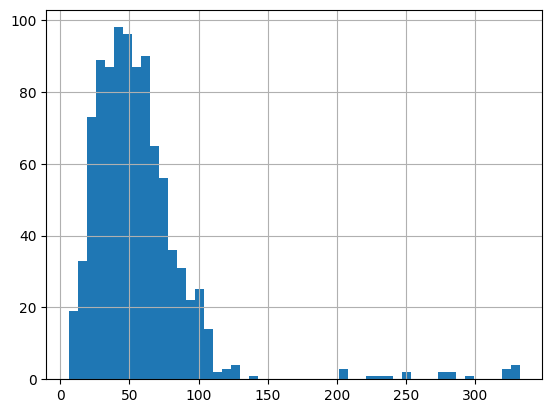

In [92]:
df["Trip_Price"].hist(bins=50)

<Axes: ylabel='Density'>

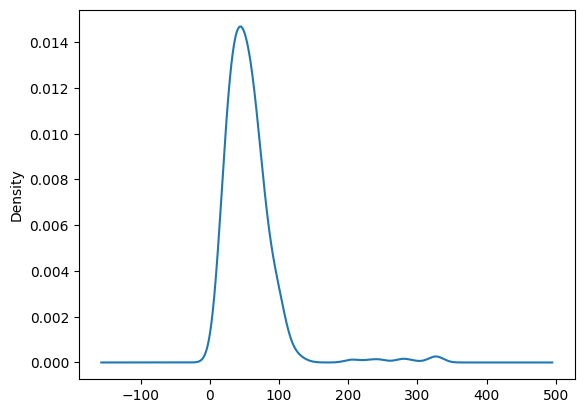

In [89]:
df_clean["Trip_Price"].plot(kind="kde")

<Axes: >

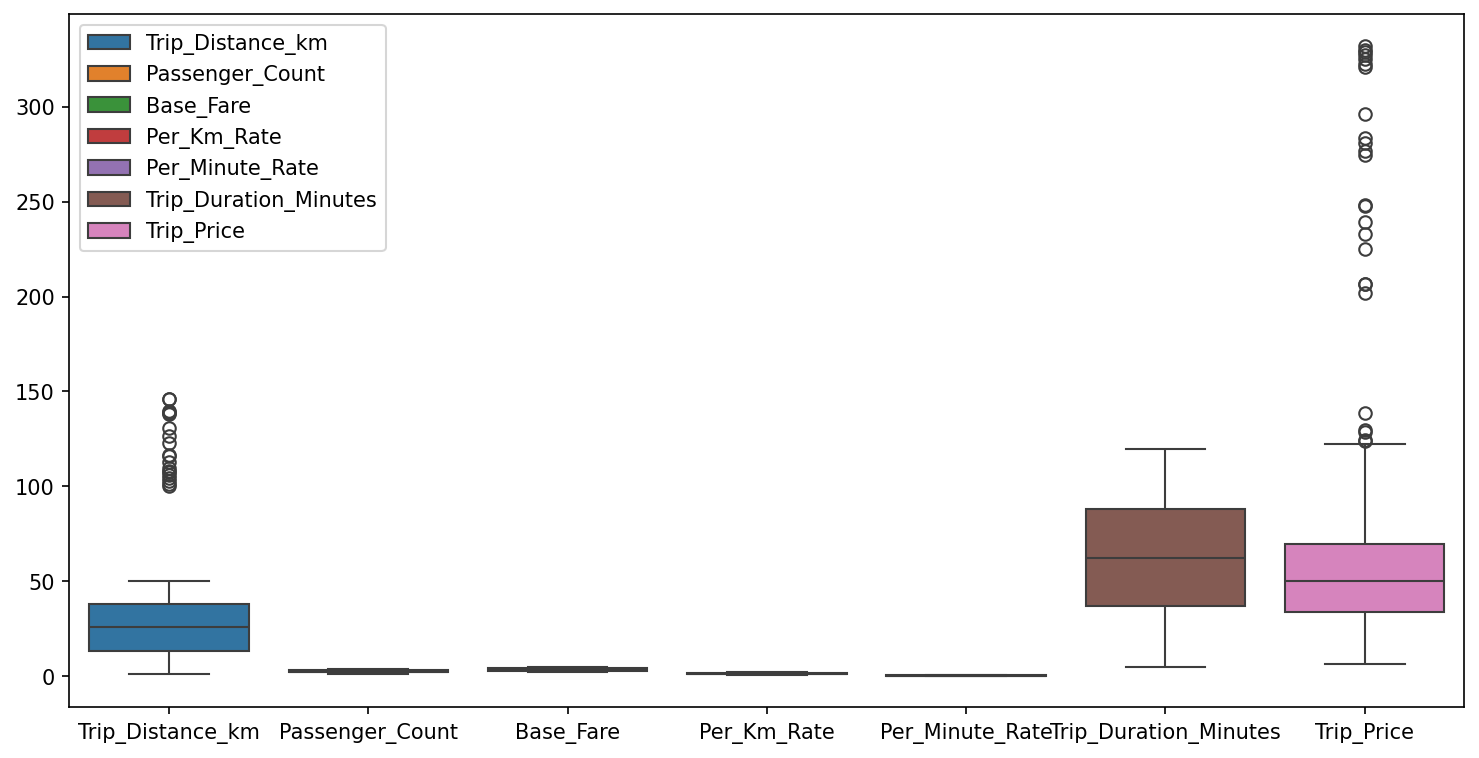

In [91]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=150)
sns.boxplot(df_clean, legend=True)

## save new cleaned data into csv

In [95]:
df.to_csv("../src/taxipred/data/taxi_trip_pricing_cleaned.csv")